## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look clean
plt.style.use("default")

import warnings
warnings.filterwarnings("ignore")

## Load the dataset (Step 1)

In [2]:
# Load dataset
df = pd.read_csv("./Delhi crime records.csv")

# Check first 5
df.head()

,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Aug 2022
0,DACOITY,48,47,28,30,27,14,34,24,36,...,33,82,75,46,36,25,15,9,26,17
1,MURDER,547,531,485,481,455,476,495,554,552,...,517,586,570,528,487,513,521,472,459,512
2,ATT. TO MURDER,510,440,407,519,467,510,530,389,369,...,585,770,770,646,645,529,487,570,761,833
3,ROBBERY,624,502,441,461,510,541,557,541,515,...,1245,6464,7407,4761,3147,2444,1956,1963,2333,2331
4,RIOT,165,139,80,67,61,87,87,71,57,...,113,160,130,79,50,23,23,689,68,91


### Understand the data

In [3]:
# Basic Info
df.info()

# Columns name
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CRIME HEAD  17 non-null     object
 1   2001        17 non-null     int64 
 2   2002        17 non-null     int64 
 3   2003        17 non-null     int64 
 4   2004        17 non-null     int64 
 5   2005        17 non-null     int64 
 6   2006        17 non-null     int64 
 7   2007        17 non-null     int64 
 8   2008        17 non-null     int64 
 9   2009        17 non-null     int64 
 10  2010        17 non-null     int64 
 11  2011        17 non-null     int64 
 12  2012        17 non-null     int64 
 13  2013        17 non-null     int64 
 14  2014        17 non-null     int64 
 15  2015        17 non-null     int64 
 16  2016        17 non-null     int64 
 17  2017        17 non-null     int64 
 18  2018        17 non-null     int64 
 19  2019        17 non-null     int64 
 20  2020        

Index(['CRIME HEAD', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', 'Aug 2022'],
      dtype='object')

In [4]:
df.isnull().sum()

CRIME HEAD    0
2001          0
2002          0
2003          0
2004          0
2005          0
2006          0
2007          0
2008          0
2009          0
2010          0
2011          0
2012          0
2013          0
2014          0
2015          0
2016          0
2017          0
2018          0
2019          0
2020          0
2021          0
Aug 2022      0
dtype: int64

## Data Cleaning (Step 2)

In [5]:
# Rename Aug 2022 to 2022.
df = df.rename(columns = {"Aug 2022" : "2022"})

df.columns

Index(['CRIME HEAD', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

### Reshape data

In [6]:
df_long = df.melt(
        id_vars = ['CRIME HEAD'],
        var_name = "Year",
        value_name = "Crime_Count"
)

df_long.head()

,CRIME HEAD,Year,Crime_Count
0,DACOITY,2001,48
1,MURDER,2001,547
2,ATT. TO MURDER,2001,510
3,ROBBERY,2001,624
4,RIOT,2001,165


In [7]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CRIME HEAD   374 non-null    object
 1   Year         374 non-null    object
 2   Crime_Count  374 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 8.9+ KB


In [8]:
print(df_long.columns)

Index(['CRIME HEAD', 'Year', 'Crime_Count'], dtype='object')


### Final cleaning

In [9]:
# Conver years to Integers
df_long["Year"] = df_long["Year"].astype("int")

# Sort values
df_long = df_long.sort_values(
    by = ["CRIME HEAD", "Year"]
). reset_index(drop = True)

df_long.head()

,CRIME HEAD,Year,Crime_Count
0,ATT. TO MURDER,2001,510
1,ATT. TO MURDER,2002,440
2,ATT. TO MURDER,2003,407
3,ATT. TO MURDER,2004,519
4,ATT. TO MURDER,2005,467


In [10]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CRIME HEAD   374 non-null    object
 1   Year         374 non-null    int64 
 2   Crime_Count  374 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.9+ KB


## Step 3 : EXPLORATORY DATA ANALYSIS (EDA)

### Line plot – total crime over years

In [11]:
# Overall crime trend in Delhi
total_crime_year = df_long.groupby("Year")["Crime_Count"].sum().reset_index()

total_crime_year

,Year,Crime_Count
0,2001,38780
1,2002,34016
2,2003,32158
3,2004,36476
4,2005,37140
5,2006,36690
6,2007,37480
7,2008,36957
8,2009,39476
9,2010,41300


In [12]:
# df_long[df_long["Year"]==2002]\
# .groupby("CRIME HEAD")["Crime_Count"].sum().reset_index()

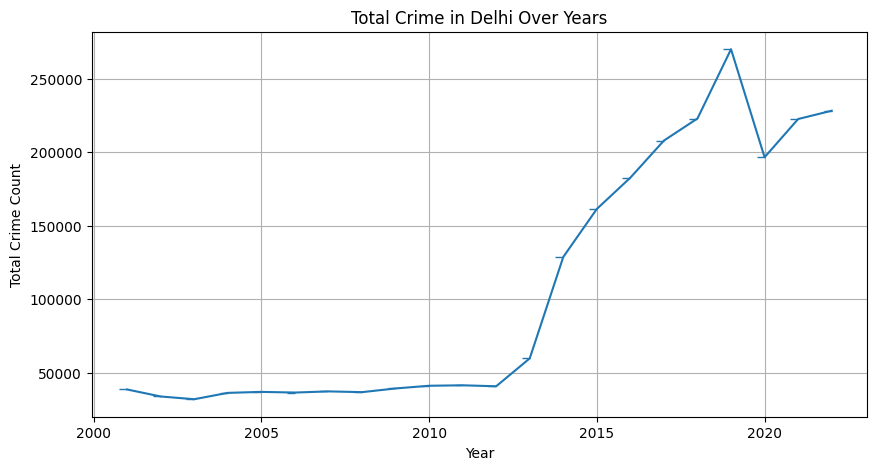

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(
    total_crime_year["Year"],
    total_crime_year["Crime_Count"],
    marker = "o"
)

plt.title("Total Crime in Delhi Over Years")
plt.xlabel("Year")
plt.ylabel("Total Crime Count")
plt.grid(True)
plt.show()

### crime categories (overall)

In [14]:
crimes = df_long.groupby("CRIME HEAD")["Crime_Count"].sum()
crimes

CRIME HEAD
ATT. TO MURDER       11873
BURGLARY             89907
DACOITY                745
FATAL ACCIDENT       38530
HOUSE THEFT          96102
HURT                 37531
KID. FOR RANSOM        553
M. O. WOMEN          42021
M.V.THEFT           481601
MURDER               11370
OTHER KID./ABD       86265
OTHER THEFT        1145432
RAPE                 26937
RIOT                  2422
ROBBERY              40512
SIMPLE ACCIDENT     129567
SNATCHING            92282
Name: Crime_Count, dtype: int64

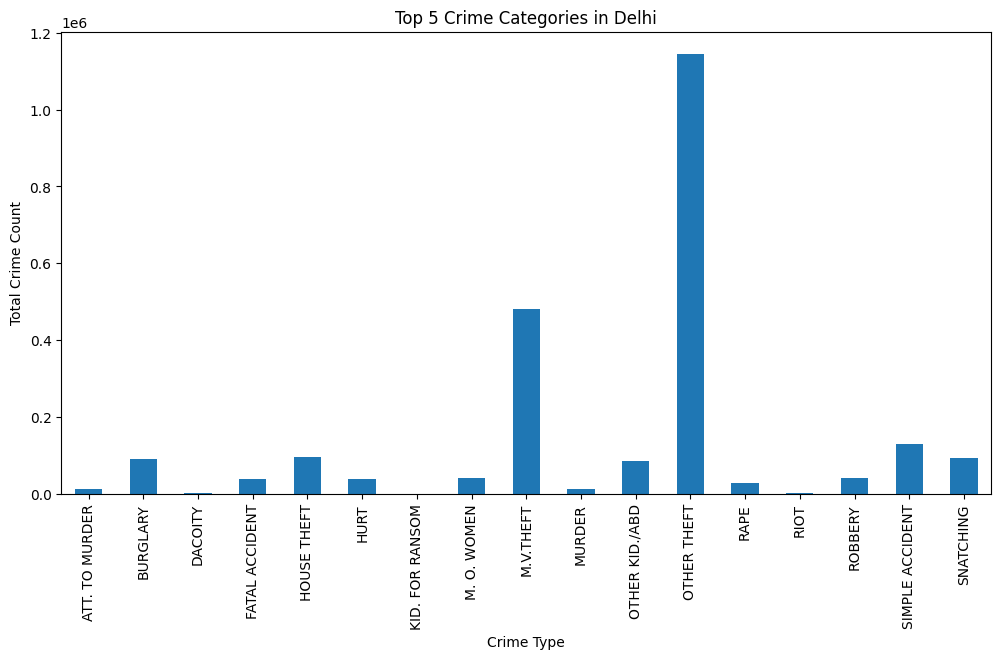

In [15]:
plt.figure(figsize = (12, 6))
crimes.plot(kind = "bar")

plt.title("Top 5 Crime Categories in Delhi")
plt.xlabel("Crime Type")
plt.xticks(rotation=90)
plt.ylabel("Total Crime Count")
plt.show()

### Top 5 crime categories (overall)

In [16]:
Top_Crimes = df_long.groupby("CRIME HEAD")["Crime_Count"].sum().sort_values(ascending = False).head(6)

Top_Crimes

CRIME HEAD
OTHER THEFT        1145432
M.V.THEFT           481601
SIMPLE ACCIDENT     129567
HOUSE THEFT          96102
SNATCHING            92282
BURGLARY             89907
Name: Crime_Count, dtype: int64

#### Bar chart – Top 5 crimes

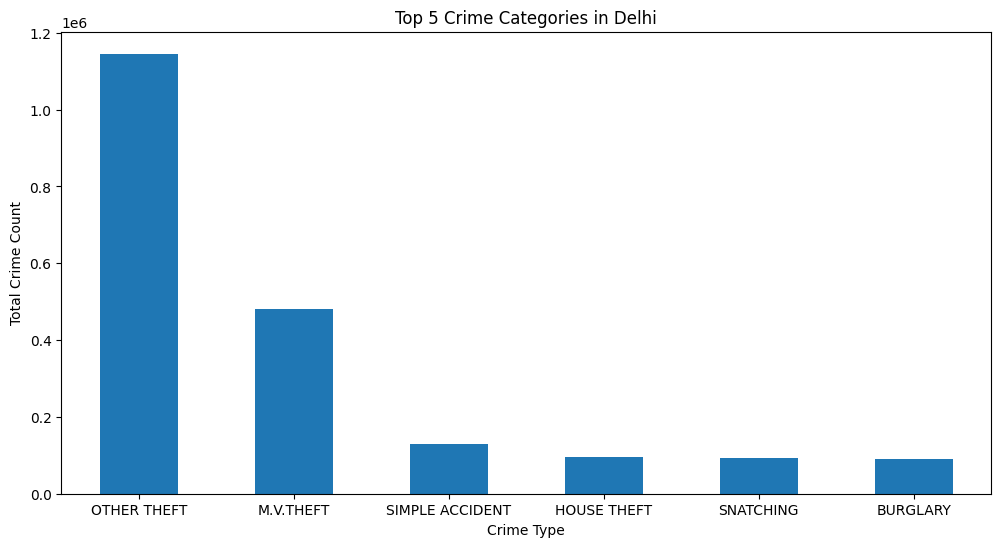

In [17]:
plt.figure(figsize = (12, 6))
Top_Crimes.plot(kind = "bar")

plt.title("Top 5 Crime Categories in Delhi")
plt.xlabel("Crime Type")
plt.xticks(rotation=0)
plt.ylabel("Total Crime Count")
plt.show()

### Trend of ONE crime type (example: MURDER)

In [18]:
Murder_data = df_long[df_long["CRIME HEAD"] == "MURDER"]
Murder_data

,CRIME HEAD,Year,Crime_Count
198,MURDER,2001,547
199,MURDER,2002,531
200,MURDER,2003,485
201,MURDER,2004,481
202,MURDER,2005,455
203,MURDER,2006,476
204,MURDER,2007,495
205,MURDER,2008,554
206,MURDER,2009,552
207,MURDER,2010,565


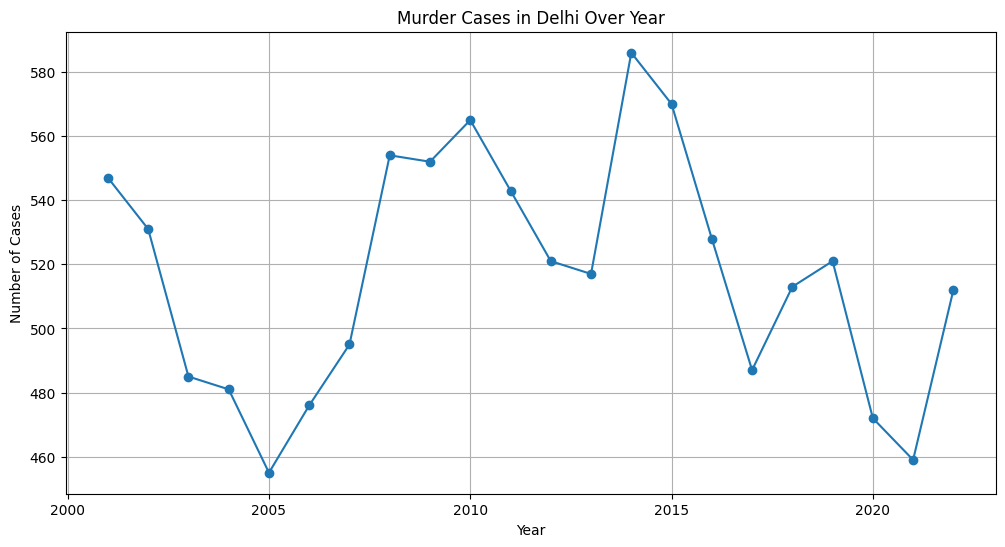

In [19]:
plt.figure(figsize = (12, 6))
plt.plot(
    Murder_data["Year"],
    Murder_data["Crime_Count"],
    marker = "o"
)

plt.title("Murder Cases in Delhi Over Year")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()

### Plot Heatmap

In [20]:
heatmap_data = df_long.pivot_table(
    index = "CRIME HEAD",
    columns = "Year",
    values = "Crime_Count",
    aggfunc = "sum"
)

heatmap_data.head(5)

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
CRIME HEAD,,,,,,,,,,,,,,,,,,,,,
ATT. TO MURDER,510,440,407,519,467,510,530,389,369,311,...,585,770,770,646,645,529,487,570,761,833
BURGLARY,3029,2360,1898,1875,2093,1950,2055,1926,1733,1502,...,2835,10309,12848,14307,9819,4117,3026,2199,2637,4255
DACOITY,48,47,28,30,27,14,34,24,36,32,...,33,82,75,46,36,25,15,9,26,17
FATAL ACCIDENT,1889,1641,1846,1912,1939,2130,2079,2015,2272,2104,...,1778,1629,1582,1548,1565,1657,1433,1163,1206,1273
HOUSE THEFT,1776,1418,1554,1549,1453,1408,1599,1539,1948,1868,...,3216,12735,15318,14721,10739,3727,2630,2036,2485,8719


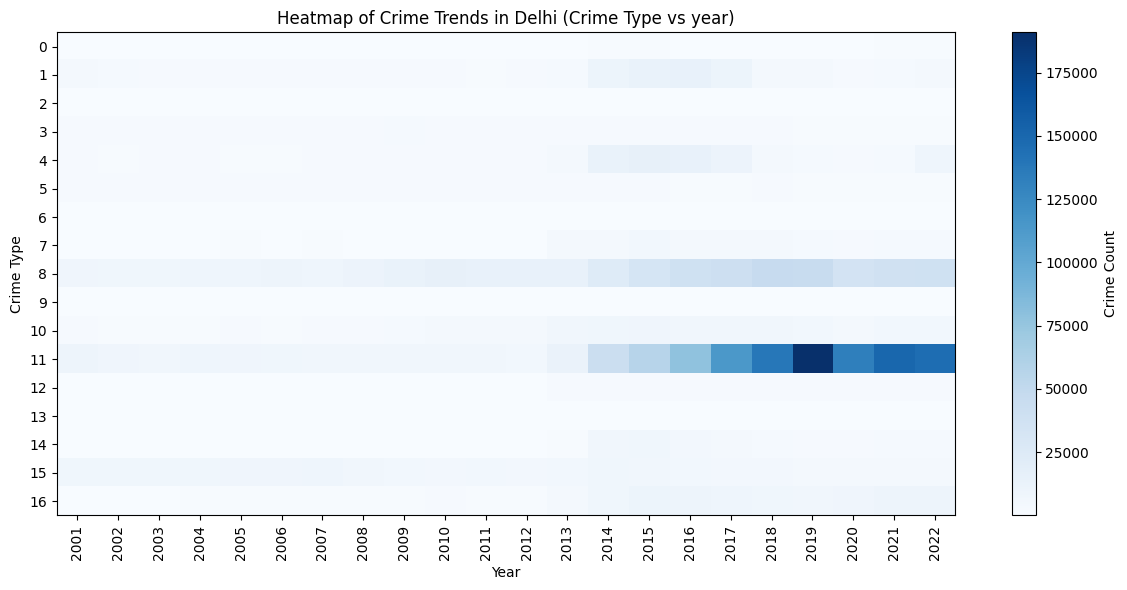

In [21]:
plt.figure(figsize = (12, 6))
plt.imshow(heatmap_data, cmap = "Blues", aspect = "auto")

plt.title("Heatmap of Crime Trends in Delhi (Crime Type vs year)")
plt.xlabel("Year")
plt.ylabel("Crime Type")

plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns, rotation = 90)
plt.yticks(range(len(heatmap_data.index)))

plt.colorbar(label = "Crime Count")
plt.tight_layout()
plt.show()

“The heatmap helps compare crime intensity across different crime categories and years, making long-term patterns easy to identify.”

## Key Insights from the Analysis

- Total crime in Delhi shows fluctuating trends over the years, indicating changes in reporting, population, and law enforcement measures.

- Certain crime categories such as Snatching, Robbery, and Theft-related crimes contribute significantly to overall crime volume.

- Violent crimes like Murder and Attempt to Murder remain comparatively stable over time.

- The heatmap visualization highlights crime-type intensity differences across years, making long-term patterns easy to identify.

- Such trend analysis can support policy monitoring and administrative planning by identifying areas that need focused intervention.